<a href="https://colab.research.google.com/github/Vandanasharma-1/Personal-Project-Practice-ML-/blob/main/1.%20Titanic%20Survival%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = {
        'PassengerId': range(1, 892),
        'Survived': np.random.randint(0, 2, 891),
        'Pclass': np.random.randint(1, 4, 891),
        'Name': ['Mr. John Doe'] * 891,
        'Sex': np.random.choice(['male', 'female'], 891),
        'Age': np.random.rand(891) * 80,
        'SibSp': np.random.randint(0, 5, 891),
        'Parch': np.random.randint(0, 5, 891),
        'Ticket': ['ABC' + str(i) for i in range(891)],
        'Fare': np.random.rand(891) * 100,
        'Cabin': ['C' + str(i) for i in range(891)],
        'Embarked': np.random.choice(['S', 'C', 'Q'], 891)
    }

In [ ]:
train_df=pd.DataFrame(data)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,Mr. John Doe,male,11.185155,3,2,ABC0,19.139280,C0,Q
1,2,0,1,Mr. John Doe,female,38.401385,0,1,ABC1,68.729406,C1,Q
2,3,1,2,Mr. John Doe,male,76.236865,0,2,ABC2,12.748226,C2,Q
3,4,0,1,Mr. John Doe,female,21.779986,1,1,ABC3,41.852414,C3,Q
4,5,0,3,Mr. John Doe,female,74.630075,4,3,ABC4,73.175376,C4,C


In [ ]:
train_df.loc[1:10, 'Age']=np.nan
train_df.loc[50:60, 'Cabin'] = np.nan
train_df.loc[80:81, 'Embarked'] = np.nan

In [ ]:
test_data = {
        'PassengerId': range(892, 1310),
        'Pclass': np.random.randint(1, 4, 418),
        'Name': ['Mr. Jane Doe'] * 418,
        'Sex': np.random.choice(['male', 'female'], 418),
        'Age': np.random.rand(418) * 80,
        'SibSp': np.random.randint(0, 5, 418),
        'Parch': np.random.randint(0, 5, 418),
        'Ticket': ['DEF' + str(i) for i in range(418)],
        'Fare': np.random.rand(418) * 100,
        'Cabin': ['D' + str(i) for i in range(418)],
        'Embarked': np.random.choice(['S', 'C', 'Q'], 418)
    }

In [ ]:
test_df = pd.DataFrame(test_data)
test_df.loc[1:5, 'Age'] = np.nan
test_df.loc[10:15, 'Fare'] = np.nan
test_df.loc[20:25, 'Cabin'] = np.nan


In [ ]:
sample_submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': np.random.randint(0, 2, len(test_df))})



In [ ]:
sample_submission_df

,PassengerId,Survived
0,892,1
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,1
416,1308,0


In [ ]:
print('Train data shape : ', train_df.shape)

Train data shape :  (891, 12)


In [ ]:
print('Test data shape : ', test_df.shape)

Test data shape :  (418, 11)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          881 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        880 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,10
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,5
SibSp,0
Parch,0
Ticket,0
Fare,6
Cabin,6


In [ ]:
sns.set_style("whitegrid")

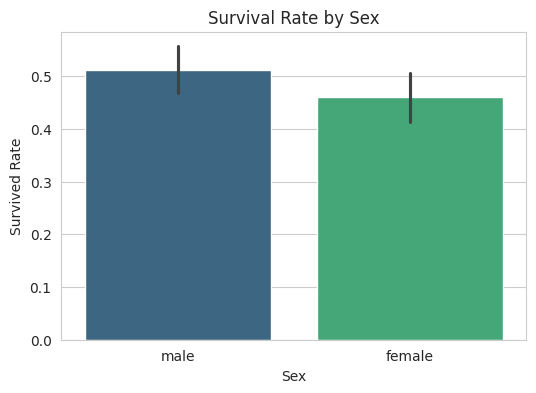

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=train_df, palette='viridis')
plt.title('Survival Rate by Sex')
plt.ylabel('Survived Rate')
plt.show()

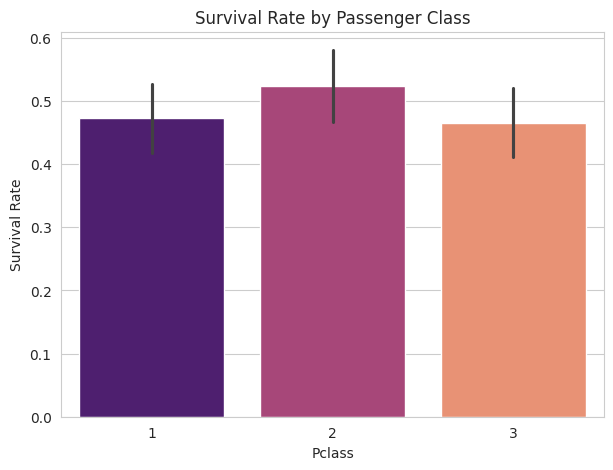

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', data=train_df, palette='magma')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


Text(0, 0.5, 'Count')

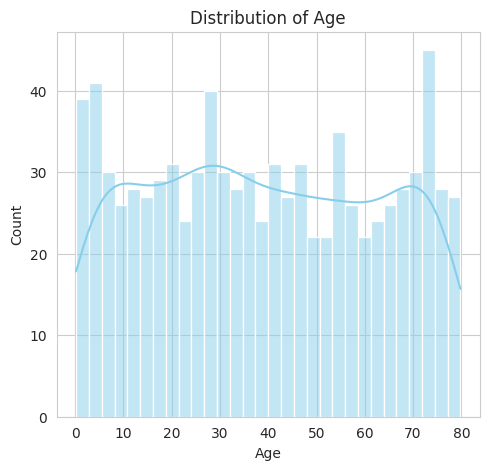

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')


In [ ]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr. Jane Doe,male,56.164244,2,4,DEF0,13.231614,D0,S
1,893,1,Mr. Jane Doe,female,NaN,0,1,DEF1,54.124748,D1,S
2,894,2,Mr. Jane Doe,female,NaN,1,0,DEF2,20.867617,D2,S
3,895,3,Mr. Jane Doe,male,NaN,3,2,DEF3,61.952138,D3,C
4,896,3,Mr. Jane Doe,female,NaN,1,1,DEF4,37.833664,D4,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,2,Mr. Jane Doe,male,31.166133,2,1,DEF413,16.912782,D413,C
414,1306,3,Mr. Jane Doe,male,58.810321,4,4,DEF414,34.502889,D414,Q
415,1307,3,Mr. Jane Doe,female,76.926644,1,2,DEF415,73.757958,D415,Q
416,1308,1,Mr. Jane Doe,female,45.899267,3,4,DEF416,69.418659,D416,C


In [ ]:
test_passenger_ids = test_df['PassengerId']

In [ ]:
test_passenger_ids

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:
combined_df = pd.concat([train_df.drop('Survived', axis=1), test_df], ignore_index=True)

In [ ]:
def extract_title(df):
    """Extracts title from Name and groups rare titles."""
    df['Title'] = df['Name'].apply(lambda x: x.split('.')[0].strip())
    rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
    df['Title'] = df['Title'].replace(rare_titles, 'Rare')
    return df


In [ ]:
def create_family_features(df):
    """Creates FamilySize and IsAlone features."""
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    return df

In [ ]:
def extract_cabin_deck(df):
    """Extracts cabin deck from Cabin, imputes missing as 'U' (Unknown)."""
    df['Cabin_Deck'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'U')
    return df

In [ ]:
combined_df=extract_title(combined_df)
combined_df=create_family_features(combined_df)
combined_df=extract_cabin_deck(combined_df)

In [ ]:
combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Cabin_Deck
0,1,1,Mr. John Doe,male,11.185155,3,2,ABC0,19.139280,C0,Q,Mr,6,0,C
1,2,1,Mr. John Doe,female,NaN,0,1,ABC1,68.729406,C1,Q,Mr,2,0,C
2,3,2,Mr. John Doe,male,NaN,0,2,ABC2,12.748226,C2,Q,Mr,3,0,C
3,4,1,Mr. John Doe,female,NaN,1,1,ABC3,41.852414,C3,Q,Mr,3,0,C
4,5,3,Mr. John Doe,female,NaN,4,3,ABC4,73.175376,C4,C,Mr,8,0,C


In [ ]:
combined_df=combined_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'SibSp', 'Parch'], axis=1)

In [ ]:
combined_df

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Cabin_Deck
0,1,male,11.185155,19.139280,Q,Mr,6,0,C
1,1,female,NaN,68.729406,Q,Mr,2,0,C
2,2,male,NaN,12.748226,Q,Mr,3,0,C
3,1,female,NaN,41.852414,Q,Mr,3,0,C
4,3,female,NaN,73.175376,C,Mr,8,0,C
...,...,...,...,...,...,...,...,...,...
1304,2,male,31.166133,16.912782,C,Mr,4,0,D
1305,3,male,58.810321,34.502889,Q,Mr,9,0,D
1306,3,female,76.926644,73.757958,Q,Mr,4,0,D
1307,1,female,45.899267,69.418659,C,Mr,8,0,D


In [ ]:
X=combined_df.iloc[:len(train_df)]

In [ ]:
X.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Cabin_Deck
0,1,male,11.185155,19.139280,Q,Mr,6,0,C
1,1,female,NaN,68.729406,Q,Mr,2,0,C
2,2,male,NaN,12.748226,Q,Mr,3,0,C
3,1,female,NaN,41.852414,Q,Mr,3,0,C
4,3,female,NaN,73.175376,C,Mr,8,0,C


In [ ]:
y=train_df['Survived']

In [ ]:
X_test=combined_df.iloc[len(train_df):]

In [ ]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Cabin_Deck
891,3,male,56.164244,13.231614,S,Mr,7,0,D
892,1,female,NaN,54.124748,S,Mr,2,0,D
893,2,female,NaN,20.867617,S,Mr,2,0,D
894,3,male,NaN,61.952138,C,Mr,6,0,D
895,3,female,NaN,37.833664,S,Mr,3,0,D


In [ ]:
numerical_features=['Age', 'Fare', 'FamilySize']
categorical_features=['Pclass', 'Sex', 'Embarked', 'Title', 'IsAlone', 'Cabin_Deck']

In [ ]:
# numerical features
numerical_transformer=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
# categorical features
categorical_transformer=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Applying all that
preprocessor=ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [ ]:
X.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Cabin_Deck
0,1,male,11.185155,19.139280,Q,Mr,6,0,C
1,1,female,NaN,68.729406,Q,Mr,2,0,C
2,2,male,NaN,12.748226,Q,Mr,3,0,C
3,1,female,NaN,41.852414,Q,Mr,3,0,C
4,3,female,NaN,73.175376,C,Mr,8,0,C


In [ ]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Cabin_Deck
891,3,male,56.164244,13.231614,S,Mr,7,0,D
892,1,female,NaN,54.124748,S,Mr,2,0,D
893,2,female,NaN,20.867617,S,Mr,2,0,D
894,3,male,NaN,61.952138,C,Mr,6,0,D
895,3,female,NaN,37.833664,S,Mr,3,0,D


In [ ]:
print("\nFeatures after initial engineering (X head):")
print(X.head())
print("\nFeatures after initial engineering (X_test head):")
print(X_test.head())

print(f"\nShape of X before preprocessing: {X.shape}")
print(f"Shape of X_test before preprocessing: {X_test.shape}")


Features after initial engineering (X head):
   Pclass     Sex        Age       Fare Embarked Title  FamilySize  IsAlone  \
0       1    male  11.185155  19.139280        Q    Mr           6        0   
1       1  female        NaN  68.729406        Q    Mr           2        0   
2       2    male        NaN  12.748226        Q    Mr           3        0   
3       1  female        NaN  41.852414        Q    Mr           3        0   
4       3  female        NaN  73.175376        C    Mr           8        0   

  Cabin_Deck  
0          C  
1          C  
2          C  
3          C  
4          C  

Features after initial engineering (X_test head):
     Pclass     Sex        Age       Fare Embarked Title  FamilySize  IsAlone  \
891       3    male  56.164244  13.231614        S    Mr           7        0   
892       1  female        NaN  54.124748        S    Mr           2        0   
893       2  female        NaN  20.867617        S    Mr           2        0   
894       3   

## ******************Models************************

In [ ]:
# 1 Logistic Regression

pipeline_lr=Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', LogisticRegression(random_state=42, solver='liblinear'))])

In [ ]:
pipeline_dt=Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
pipeline_rf=Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
pipeline_gb=Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', GradientBoostingClassifier(random_state=42))])

In [ ]:
pipelines={
    'Logistic Regression':pipeline_lr,
    'Decision Tree':pipeline_dt,
    'Random Forest':pipeline_rf,
    'Gradient Boosting':pipeline_gb
}

## --- Model Training and Evaluation (Cross-Validation) ---

In [ ]:
result={}

In [ ]:
cv_splitter=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
print("\n--- Model Training and Cross-Validation Results ---")


--- Model Training and Cross-Validation Results ---


In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
for name, pipeline in pipelines.items():
    print(f"\nTraining {name}...")
    cv_scores = cross_val_score(pipeline, X, y, cv=cv_splitter, scoring='accuracy')
    result[name] = cv_scores
    print(f'{name} CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})')



Training Logistic Regression...
Logistic Regression CV Accuracy: 0.5140 (+/- 0.0449)

Training Decision Tree...
Decision Tree CV Accuracy: 0.4815 (+/- 0.0390)

Training Random Forest...
Random Forest CV Accuracy: 0.4939 (+/- 0.0317)

Training Gradient Boosting...
Gradient Boosting CV Accuracy: 0.4658 (+/- 0.0161)


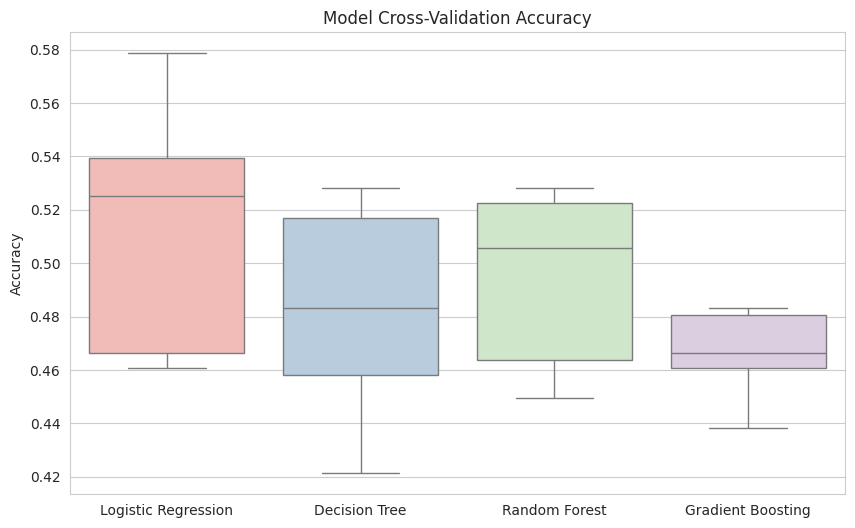

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=pd.DataFrame(result), palette='Pastel1')
plt.title('Model Cross-Validation Accuracy')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
best_model_name='Random Forest'

In [ ]:
best_pipeline=pipelines[best_model_name]

In [ ]:
best_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare',
                                                   'FamilySize']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'Title', 'IsAlone',
                                                   'Cabin_Deck'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
param_grid_rf={
    'classifier__n_estimators':[100,200,300],
    'classifier__max_depth':[5,8,10,None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

In [ ]:
print(f"\n--- Hyperparameter Tuning for {best_model_name} ---")
grid_search_rf=GridSearchCV(best_pipeline, param_grid_rf, cv=cv_splitter, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X,y)


--- Hyperparameter Tuning for Random Forest ---
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'FamilySize']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(stra...
                                                                          'Embarked',
                                                                          'Title',
                                                                          'IsAlone',
                                                                          'Cabin_Deck'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [5, 8, 10, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
print(f"\nBest parameters for {best_model_name}: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy for {best_model_name}: {grid_search_rf.best_score_:.4f}")


Best parameters for Random Forest: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.5119


In [ ]:
final_model=grid_search_rf.best_estimator_

In [ ]:
final_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare',
                                                   'FamilySize']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'Title', 'IsAlone',
                                                   'Cabin_Deck'])])),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=200,
                                        random_state=42))])

In [ ]:
final_model.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare',
                                                   'FamilySize']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'Title', 'IsAlone',
                                                   'Cabin_Deck'])])),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=200,
                                        random_state=42))])

In [ ]:
print(f"\nFinal model ('{best_model_name}') trained on full training data.")


Final model ('Random Forest') trained on full training data.
